In [1]:
import pandas as pd
import numpy as np

from distance import hamming_distance
from distance import jukes_cantor_distance

from sklearn.cluster import AgglomerativeClustering
import seaborn as sns; sns.set_theme()
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('dataset.csv', index_col = 0)

In [3]:
mutations = df.loc[:, '10':'29878'].copy()
samples = mutations.index
positions = mutations.columns
X = np.transpose(mutations.to_numpy())
print('Samples length', len(samples))
print('Positions length', len(positions))
X.shape

Samples length 3698
Positions length 4290


(4290, 3698)

In [4]:
h_distances = hamming_distance.compute_HammingDistance(X)
jukes_cantor = jukes_cantor_distance.hamming_to_jukes_cantor(h_distances, h_distances.shape[0])

In [6]:
# clustering = AgglomerativeClustering(affinity = 'precomputed', linkage = 'average').fit(h_distances)
# clustering.labels_

In [ ]:
dist = h_distances
ax = plt.subplot()
n = 1000
ax = sns.heatmap(pd.DataFrame(np.interp(dist[0:n,0:n], (dist[0:n,0:n].min(), dist[0:n,0:n].max()), (0, +1)), index = positions[0:n], columns = positions[0:n]), cmap="YlGnBu")
plt.savefig("../heatmap_hamming.pdf")


dist = jukes_cantor
ax = plt.subplot()
n = 100
ax = sns.heatmap(pd.DataFrame(dist[0:n,0:n], index = positions[0:n], columns = positions[0:n]), cmap="YlGnBu")
plt.savefig("../heatmap_jukes_cantor.pdf")

In [33]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

embedding = MDS(n_components = 3, dissimilarity = 'precomputed', n_jobs = -1, verbose = 1)
X_transformed = embedding.fit_transform(h_distances[0:5000,0:5000])
X_transformed.shape

(4290, 3)

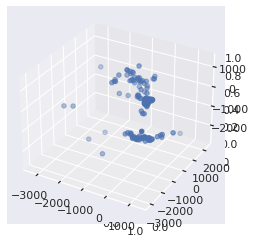

In [34]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

ax.scatter3D(X_transformed[:,0],X_transformed[:,1], X_transformed[:,2])